# Introduction to Quantum Programming

This notebook contains the solution of the [TP] introduction to quantum programming (https://github.com/ugo-nzongani/Introduction-to-Quantum-Programming/blob/main/TP.pdf) with [Qiskit](https://qiskit.org/).


<img src="https://upload.wikimedia.org/wikipedia/commons/5/51/Qiskit-Logo.svg" style="height:300px" />

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from qiskit import *
from qiskit.circuit import *
from qiskit.extensions import *
from qiskit.circuit.library import *
from qiskit.extensions.simulator.snapshot import snapshot
from qiskit.quantum_info import Statevector
from qiskit.quantum_info.operators import Operator
from qiskit.extensions.simulator.snapshot import snapshot
from qiskit.visualization import plot_state_city, plot_bloch_multivector
from qiskit.visualization import plot_state_paulivec, plot_state_hinton
from qiskit.visualization import plot_state_qsphere
from qiskit.tools.visualization import plot_histogram
from qiskit.quantum_info import random_unitary
from qiskit.tools.monitor import job_monitor
import qiskit.quantum_info as qi

In [2]:
# Function to run a quantum circuit
def run(qc, n_shots=1024, plot=True):
    backend = BasicAer.get_backend('qasm_simulator')
    job = execute(qc,backend,shots=n_shots)
    res = dict(job.result().get_counts(qc))
    if plot:
        return plot_histogram(res)
    else:
        return res

# Function to plot the Bloch Sphere
def bloch(qc):
    backend = BasicAer.get_backend('statevector_simulator')
    result = backend.run(transpile(qc, backend)).result()
    psi = result.get_statevector(qc)
    return plot_bloch_multivector(psi)

## First quantum circuits

1- Bloch Sphere representation

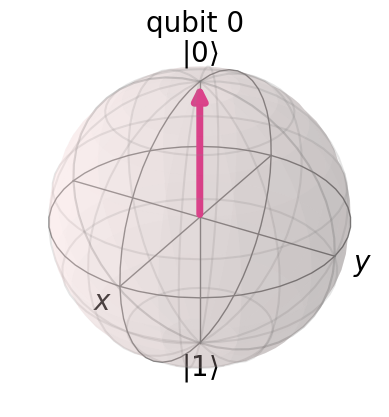

In [3]:
# |0>
q = QuantumRegister(1)
qc = QuantumCircuit(q)
bloch(qc)

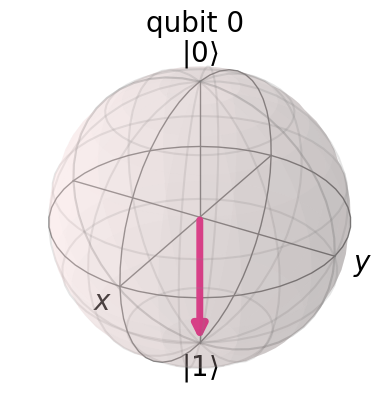

In [4]:
# |1>
q = QuantumRegister(1)
qc = QuantumCircuit(q)
qc.x(q)
bloch(qc)

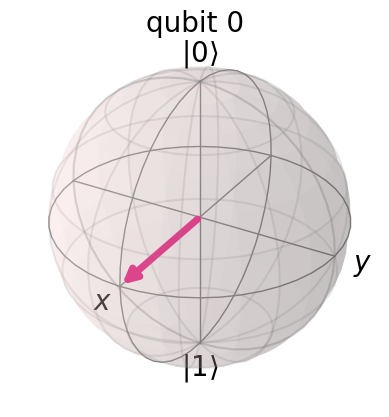

In [5]:
# |+>
q = QuantumRegister(1)
qc = QuantumCircuit(q)
qc.h(q)
bloch(qc)

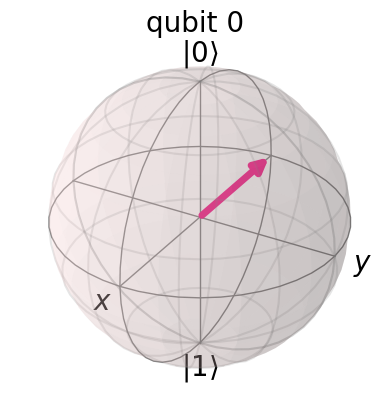

In [6]:
# |->
q = QuantumRegister(1)
qc = QuantumCircuit(q)
qc.x(q)
qc.h(q)
bloch(qc)

2- Bloch Sphere representation with two qubits

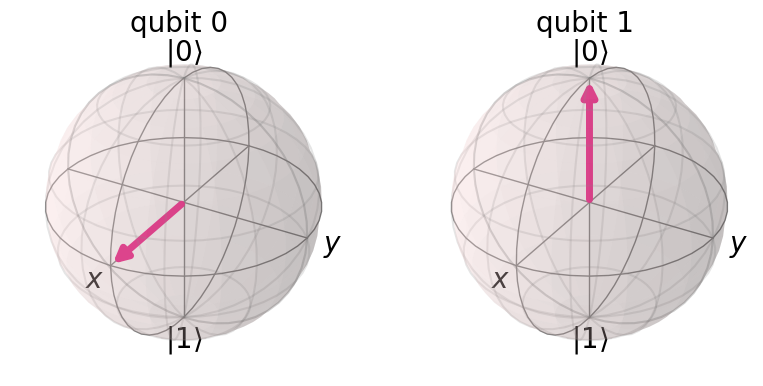

In [7]:
q = QuantumRegister(2)
qc = QuantumCircuit(q)
qc.h(q[0])
bloch(qc)

3- Bloch Sphere representation of the Bell state

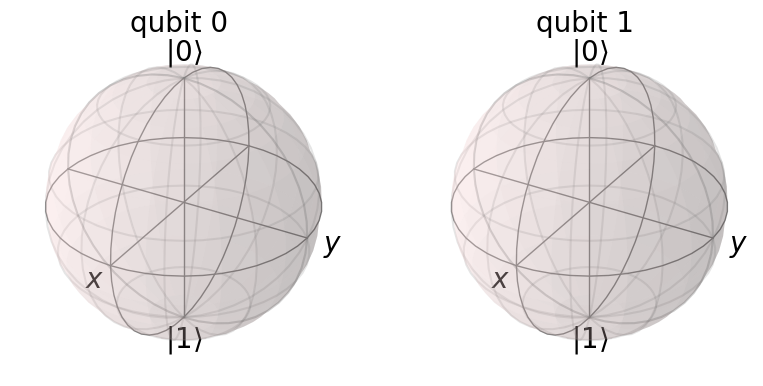

In [8]:
# |Bell>
q = QuantumRegister(2)
qc = QuantumCircuit(q)
qc.h(q[0])
qc.cnot(q[0],q[1])
bloch(qc)

The state is entangled, therefore it is not possible to describe the state of each qubit independently

4- Preparing an equal superposition for two qubits

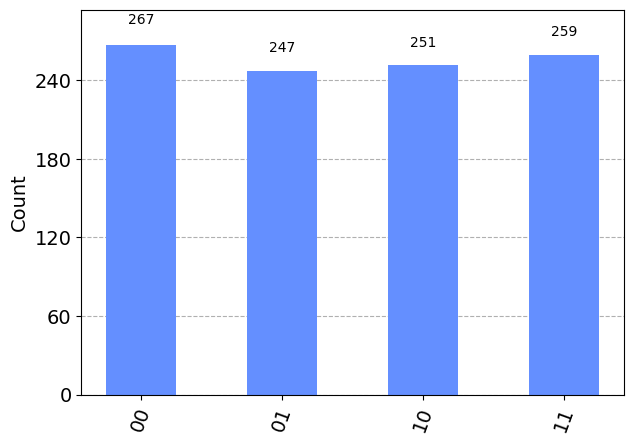

In [9]:
q = QuantumRegister(2, name='q')
c = ClassicalRegister(2, name='c')
qc = QuantumCircuit(q,c)
qc.h(q)
qc.measure(q,c)
run(qc)

5- Preparing an EPR pair on 3 qubits

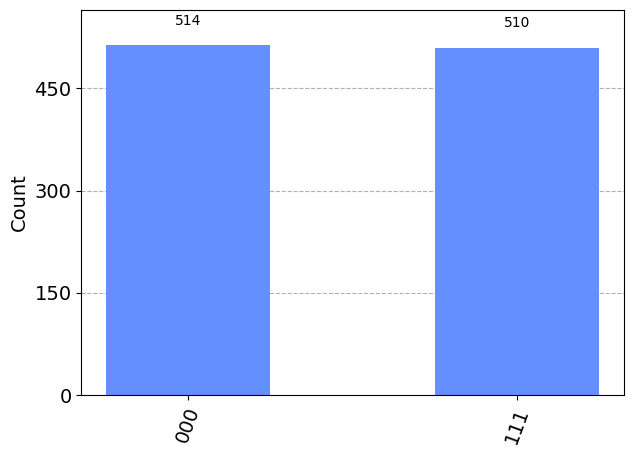

In [10]:
q = QuantumRegister(3, name='q')
c = ClassicalRegister(3, name='c')
qc = QuantumCircuit(q,c)
qc.h(q[0])
qc.cnot(q[0],q[1])
qc.cnot(q[0],q[2])
qc.measure(q,c)
run(qc)

6- Preparing a special state on 3 qubits

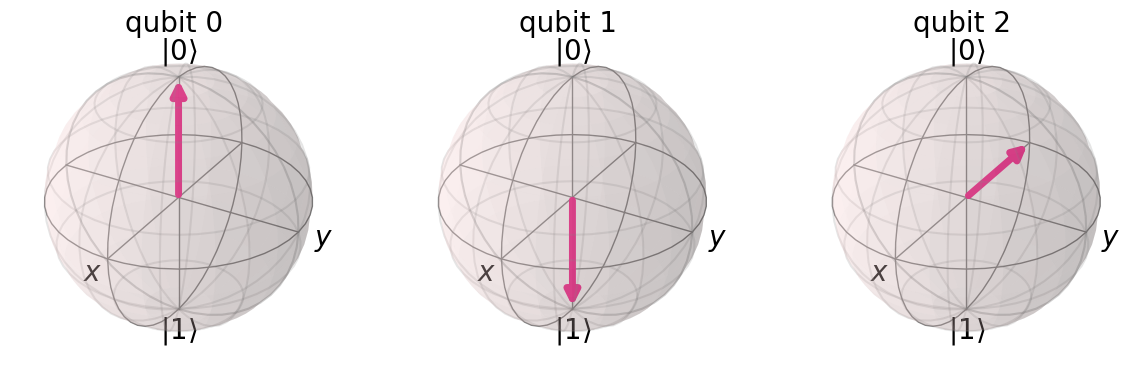

In [11]:
q = QuantumRegister(3, name='q')
c = ClassicalRegister(3, name='c')
qc = QuantumCircuit(q,c)
qc.x(q[2])
qc.h(q[2])
qc.y(q[1])
bloch(qc)

7- Swap of an arbitrary quantum state

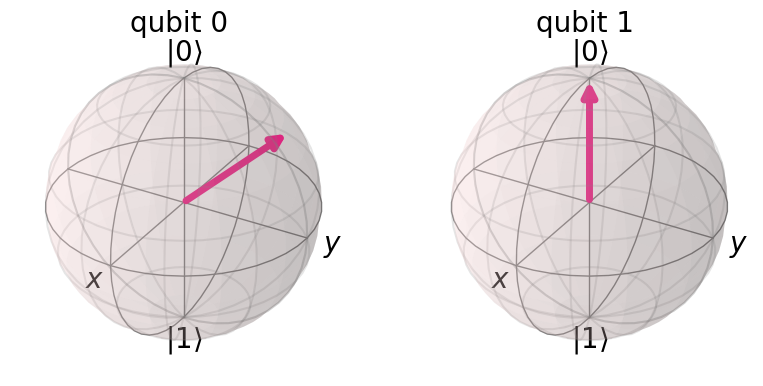

In [12]:
q = QuantumRegister(2, name='q')
qc = QuantumCircuit(q)
u = random_unitary(2)
qc.unitary(u, q[0], label='U')
bloch(qc)

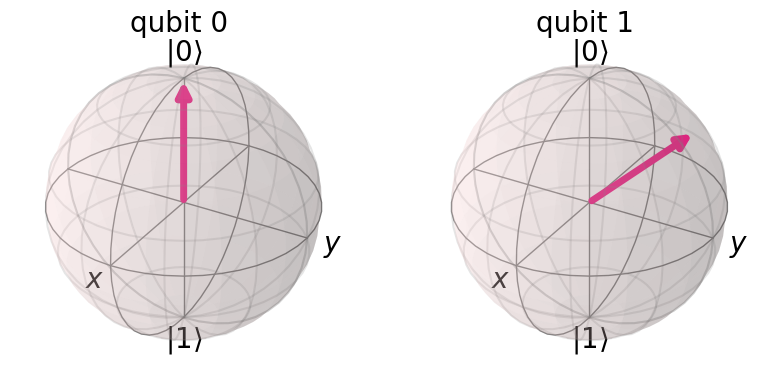

In [13]:
qc.swap(q[0],q[1])
bloch(qc)

8- Mirror transformation

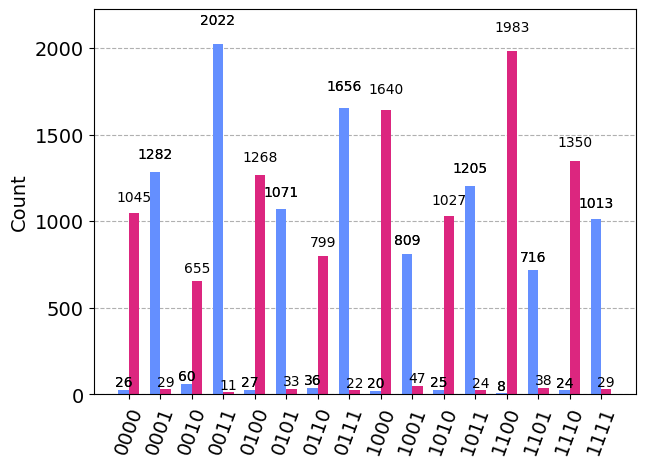

In [14]:
n = 4
unitaries = [random_unitary(2) for i in range(n)]

# qc1
q1 = QuantumRegister(n, name='q')
c1 = ClassicalRegister(n, name='c')
qc1 = QuantumCircuit(q1,c1)

# qc2
q2 = QuantumRegister(n, name='q')
c2 = ClassicalRegister(n, name='c')
qc2 = QuantumCircuit(q2,c2)
qc2.x(q2)

# Applying the unitaries on qc1 and qc2
for i in range(n):
    qc1.unitary(unitaries[i],q1[i],label='U'+str(i))
    qc2.unitary(unitaries[i],q2[i],label='U'+str(i))
    
# Measurements
qc1.measure(q1,c1)
qc2.measure(q2,c2)


qc1_res = run(qc1,n_shots=10000,plot=False)
qc2_res = run(qc2,n_shots=10000,plot=False)
plot_histogram([qc1_res,qc2_res])

## Cloning qubits ?

1- Single copy in the computational basis

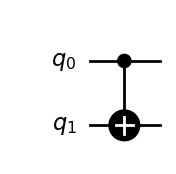

In [15]:
q = QuantumRegister(2, name='q')
qc = QuantumCircuit(q)
qc.cnot(q[0],q[1])
qc.draw('mpl', style='bw')

2- Same with second qubit in state 1

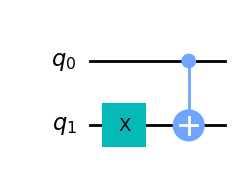

In [16]:
q = QuantumRegister(2, name='q')
qc = QuantumCircuit(q)
qc.x(q[1])
qc.cnot(q[0],q[1])
qc.draw('mpl')

3- Copy of an $n$ qubit string

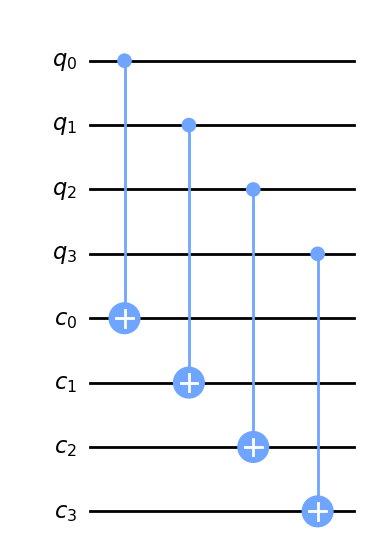

In [17]:
n = 4

q = QuantumRegister(n, name='q')
c = QuantumRegister(n, name='c')
qc = QuantumCircuit(q,c)

for i in range(n):
    qc.cnot(q[i],c[i])
    
qc.draw('mpl')

4- Swap of two arbitrary states

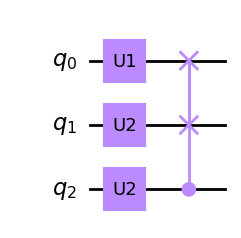

In [18]:
q = QuantumRegister(3, name='q')
qc = QuantumCircuit(q)
qc.unitary(random_unitary(2), q[0], label='U1')
qc.unitary(random_unitary(2), q[1], label='U2')
qc.unitary(random_unitary(2), q[2], label='U2')
qc.cswap(q[2],q[0],q[1])
qc.draw('mpl')

5- Two gates on a single qubit state

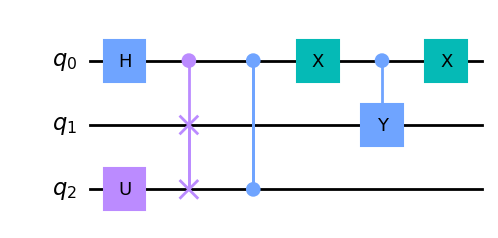

In [19]:
q = QuantumRegister(3,name='q')
qc = QuantumCircuit(q)
qc.unitary(random_unitary(2),q[2],label='U')
qc.h(q[0])
qc.cswap(q[0],q[1],q[2])
qc.cz(q[0],q[2])
qc.x(q[0])
qc.cy(q[0],q[1])
qc.x(q[0])
qc.draw('mpl')

## Single qubit interference

1- Single qubit interference implementation

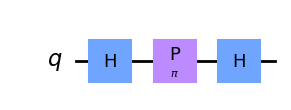

In [20]:
phi = np.pi

q = QuantumRegister(1,name='q')
qc = QuantumCircuit(q)
qc.h(q)
qc.p(phi,q)
qc.h(q)

qc.draw('mpl')

2- Plot the 0 probability for different phases

Text(0, 0.5, 'Probability of measuring 0')

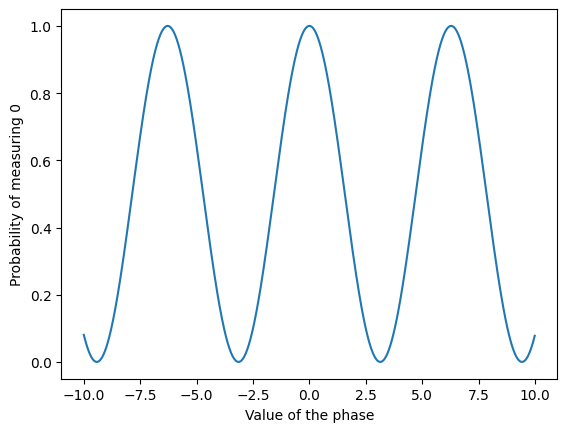

In [21]:
def prob_zero(phase):
    return (1+np.cos(phase))/2

x = np.arange(-10, 10, 0.01)
prob = np.array([prob_zero(i) for i in x])
plt.plot(x,prob)
plt.xlabel('Value of the phase')
plt.ylabel('Probability of measuring 0')

## Superdense Coding

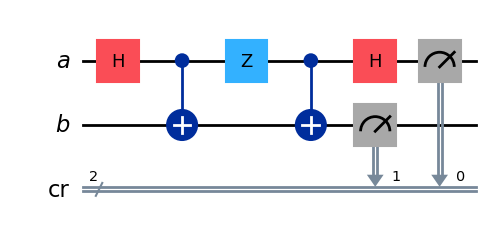

In [22]:
def superdense_coding(b2,b1):
    a = QuantumRegister(1,name='a')
    b = QuantumRegister(1,name='b')
    cr = ClassicalRegister(2,name='cr')
    qc = QuantumCircuit(a,b,cr)
    qc.h(a)
    qc.cnot(a,b)
    if b2 == 1:
        qc.x(a)
    if b1 == 1:
        qc.z(a)
    qc.cnot(a,b)
    qc.h(a)
    qc.measure(a,cr[0])
    qc.measure(b,cr[1])
    return qc

qc = superdense_coding(0,1)
qc.draw('mpl', style='iqx')

## Quantum Teleportation

1- Implementation of the Quantum Teleportation protocol

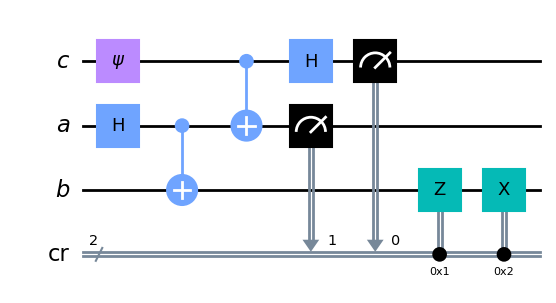

In [23]:
def before_TP(psi):
    c = QuantumRegister(1,name='c')
    a = QuantumRegister(1,name='a')
    b = QuantumRegister(1,name='b')
    qc = QuantumCircuit(c,a,b)
    qc.unitary(psi,c,label='$\psi$')
    qc.h(a)
    qc.cnot(a,b)
    return qc    
    
def Quantum_TP(psi):
    c = QuantumRegister(1,name='c')
    a = QuantumRegister(1,name='a')
    b = QuantumRegister(1,name='b')
    cr = ClassicalRegister(2,name='cr')
    qc = QuantumCircuit(c,a,b,cr)

    qc.unitary(psi,c,label='$\psi$')
    qc.h(a)
    qc.cnot(a,b)
    qc.cnot(c,a)
    qc.h(c)

    qc.measure(c,cr[0])
    qc.measure(a,cr[1])

    qc.z(2).c_if(cr, 1)
    qc.x(2).c_if(cr, 2)
    return qc

qc = Quantum_TP(random_unitary(2))
qc.draw('mpl')

2- Plot of the Bloch Sphere before and after teleporation of $|\psi>$

Before teleportation:


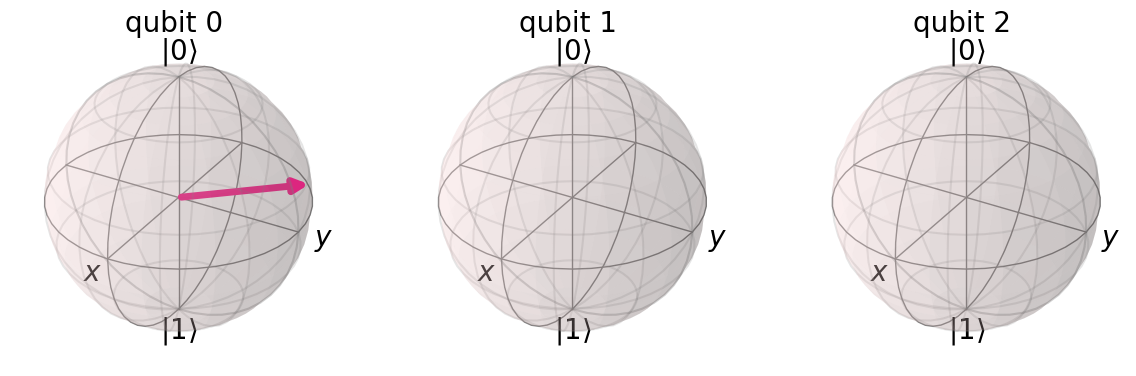

In [24]:
random_state = random_unitary(2)
qc_before = before_TP(random_state)
qc_after = Quantum_TP(random_state)
print('Before teleportation:')
bloch(qc_before)

After teleportation:


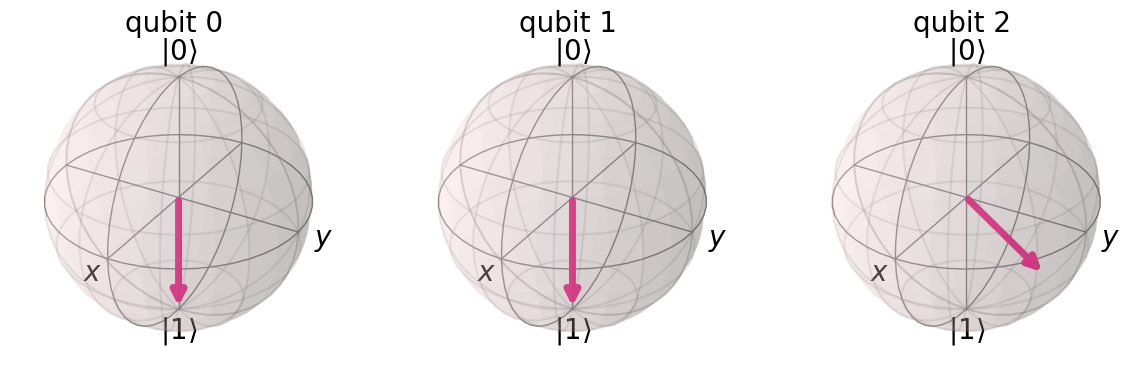

In [25]:
print('After teleportation:')
bloch(qc_after)

## Quantum Fourier Transform

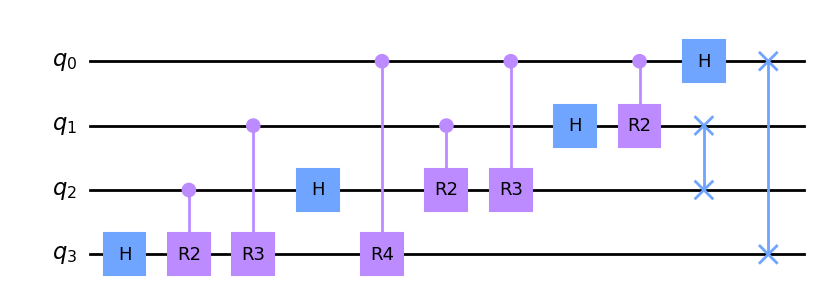

In [26]:
def qft_rotations(k):
    return np.array([[1,0],[0,np.exp(2*np.pi*1j/2**k)]])

def qft(n,swaps=True):
    q = QuantumRegister(n,name='q')
    qc = QuantumCircuit(q)
    # Rotations and Hadamards
    for i in range(n):
        qc.h(q[n-i-1])
        for j in range(2,n+1-i):
            gate = UnitaryGate(qft_rotations(j),label='R'+str(j))
            qc.append(gate.control(),[q[n-i-j],q[n-i-1]])
            #qc.append(U1Gate(2*np.pi/2**j,label='R'+str(j)).control(1),[q[n-i-j],q[n-i-1]])
    # Swaps
    if swaps:
        for i in range(n//2):
            qc.swap(q[i],q[n-i-1])
    
    return qc
    
qc = qft(4)
qc.draw('mpl')

## Quantum Phase Estimation

1- Implementation of QPE

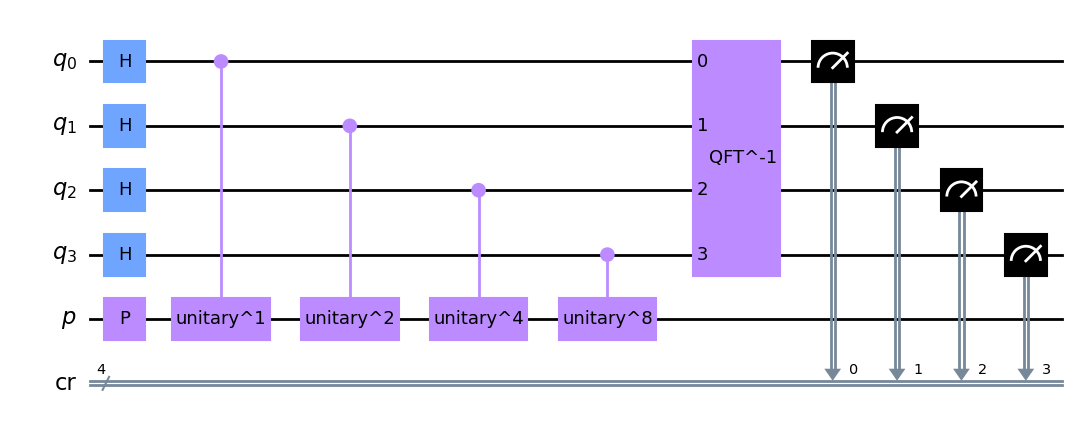

In [27]:
def QPE(n,psi,U):
    q = QuantumRegister(n,name='q')
    p = QuantumRegister(1,name='p')
    cr = ClassicalRegister(n,name='cr')
    qc = QuantumCircuit(q,p,cr)
    inverse_qft = qft(n).inverse().to_gate(label='QFT^-1')
    qc.h(q)
    qc.unitary(psi,p,label='P')
    for i in range(n):
        gate = UnitaryGate(U,label='U^'+str(i))
        qc.append(gate.power(2**i).control(),[q[i],p])
    qc.append(inverse_qft,[k for k in q])
    qc.measure(q,cr)
    return qc

U = np.array([[1,0],[0,-1]]) # Z gate
psi = np.array([[1,0],[0,1]]) # I
qc = QPE(4,psi,U)
qc.draw('mpl')

2- Approximation of $\pi$

a- Computation

In [28]:
def estimate_pi(n):
    U = np.array([[1,0],[0,np.exp(1j)]])
    psi = np.array([[0,1],[1,0]]) # X
    qc = QPE(n,psi,U)
    res = run(qc,plot=False,n_shots=10000)
    phase = int(max(res, key=res.get),2)/2**n
    pi = 1/(2*phase)
    return pi

b- Plot

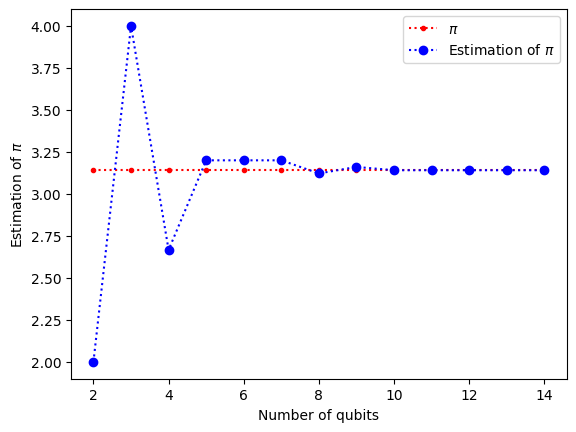

In [29]:
x = [n for n in range(2,15)]
y = [estimate_pi(n) for n in x]
pi = [np.pi for i in x]
plt.plot(x,pi,label='$\pi$',color='red',marker='.',linestyle='dotted')
plt.plot(x,y,label='Estimation of $\pi$',color='blue',marker='o',linestyle='dotted')
plt.legend()
plt.xlabel('Number of qubits')
plt.ylabel('Estimation of $\pi$')
plt.show()

## Draper Adder

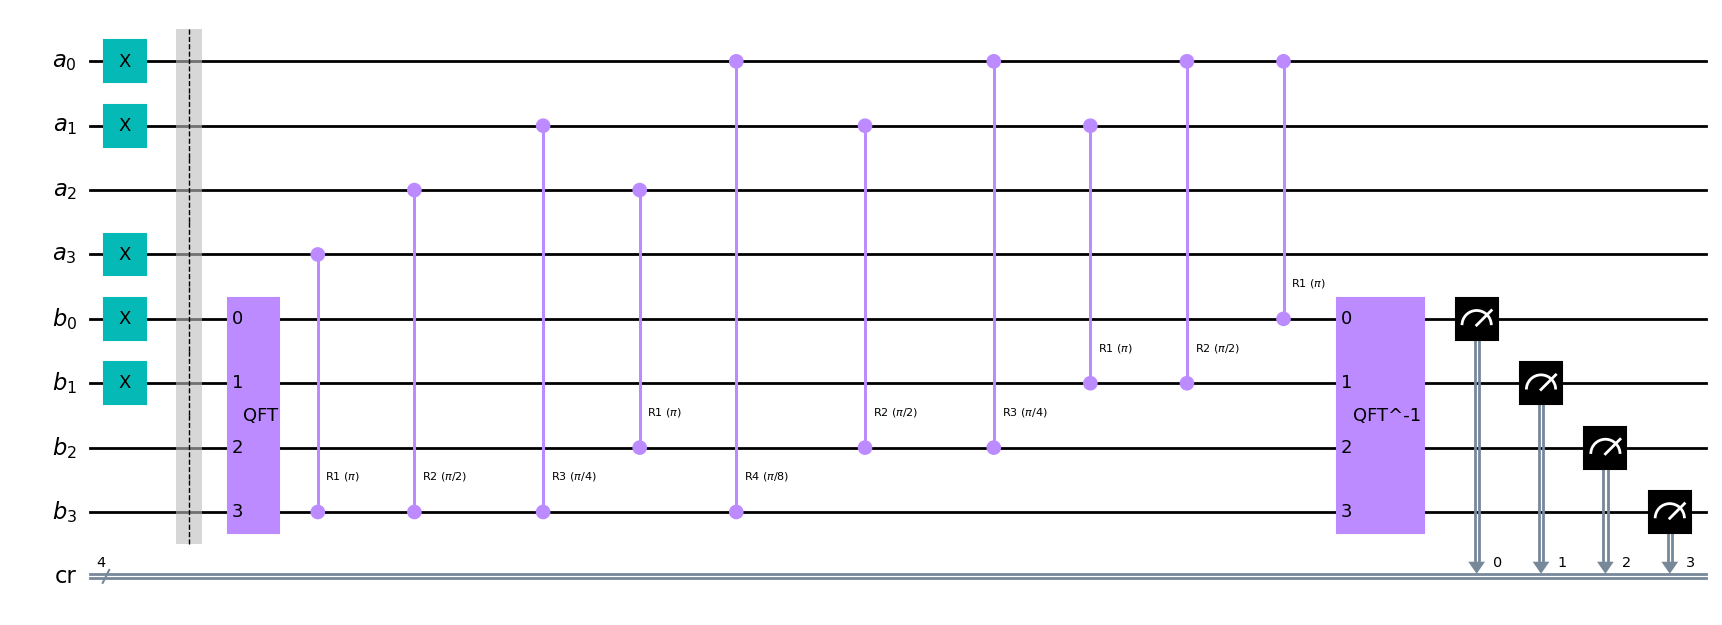

In [30]:
def draper_rotations(k):
    return np.array([[1,0],[0,np.exp(1j/2**k)]])

def Draper_Adder(x,y):
    # Finding the number of qubits needed
    n = max(len(bin(x)[2:].zfill(0)),len(bin(y)[2:].zfill(0)))
    x_binary = bin(x)[2:].zfill(n)[::-1]
    y_binary = bin(y)[2:].zfill(n)[::-1]
    a = QuantumRegister(n,name='a')
    b = QuantumRegister(n,name='b')
    cr = ClassicalRegister(n,name='cr')
    qc = QuantumCircuit(a,b,cr)

    # Initialization of the registers
    for i in range(n):
        if x_binary[i] == '1':
            qc.x(a[i])
        if y_binary[i] == '1':
            qc.x(b[i])
    qc.barrier()
    
    # Draper Adder
    qft_gate = qft(n,swaps=False).to_gate(label='QFT')
    inverse_qft = qft(n,swaps=False).inverse().to_gate(label='QFT^-1')
    qc.append(qft_gate,[i for i in b])
    for i in range(n):
        for j in range(n-i):
            qc.append(U1Gate(2*np.pi/2**(j+1),label='R'+str(j+1)).control(1),[a[n-i-j-1],b[n-i-1]])
    qc.append(inverse_qft,[i for i in b])
    qc.measure(b,cr)
    return qc

qc = Draper_Adder(11,3)
qc.draw('mpl')

In [31]:
# Function to verify if the Draper Adder is correctly implemented
def verification(x,y):
    n = max(len(bin(x)[2:].zfill(0)),len(bin(y)[2:].zfill(0)))
    outcome = run(Draper_Adder(x,y),plot=False)
    return bin((x+y)%2**n)[2:].zfill(n) == list(outcome.keys())[0]

verification(367,43)

True

## Bernstein-Vazirani Algorithm

Random bit string: 0010101100


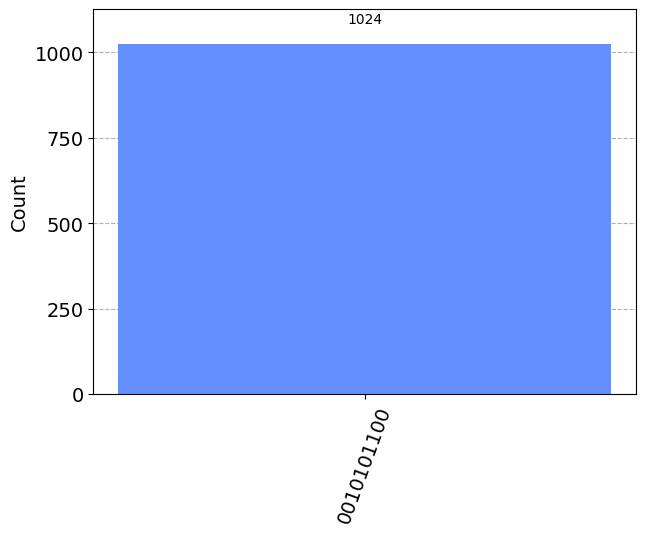

In [32]:
def rand_string(n):
    key = ""
    for i in range(n):
        temp = str(random.randint(0, 1))
        key += temp       
    return key


def bernstein_vazirani(n):
    secretnumber = rand_string(n)
    qc = QuantumCircuit(n+1,n)

    qc.h(range(n))
    qc.x(n)
    qc.h(n)

    qc.barrier()

    for index, bit in enumerate(reversed(secretnumber)):
        if bit == '1':
            qc.cx(index,n)

    qc.barrier()

    qc.h(range(n))

    qc.measure(range(n),range(n))
    print('Random bit string:',secretnumber)
    return qc

n = 10
qc = bernstein_vazirani(n)
run(qc)

## Quantum circuit complexity

In [33]:
# Function to verify the correctness of the circuits
def fidelity(qc1,qc2):
    state1 = qi.Statevector.from_instruction(qc1).data[:2]
    state2 = qi.Statevector.from_instruction(qc2).data[:2]
    scalar_prod = 0 + 0j
    for i in range(len(state1)):
        scalar_prod += np.conj(state1[i]) * state2[i]
    return abs(scalar_prod)**2

1 - Implementation of the horizontal quantum circuit

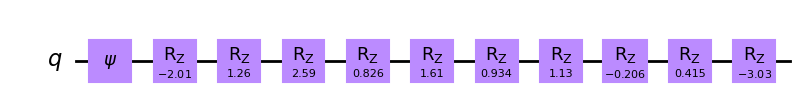

In [34]:
def horizontal_rz(n,psi,angles):
    q = QuantumRegister(1, name='q')
    qc = QuantumCircuit(q)
    qc.unitary(psi, q[0], label='$\psi$')
    for i in range(n):
        qc.rz(angles[i],q[0])
    return qc

n_rz = 10
angles = [random.uniform(-np.pi, np.pi) for i in range(n_rz)]
psi = random_unitary(2)
horizontal = horizontal_rz(n_rz,psi,angles)
horizontal.draw('mpl')

2 - Implementation of the entangling step

a - Naive method

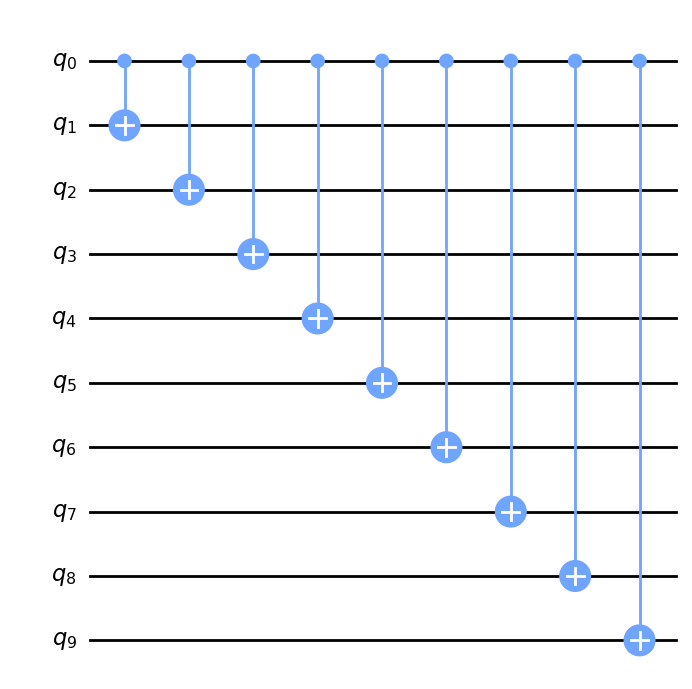

In [35]:
# Naive method
def naive_method(n):
    q = QuantumRegister(n,name='q')
    qc = QuantumCircuit(q)
    current_index = 1
    for i in range(n-1):
        qc.cnot(q[0],q[current_index])
        current_index += 1
    return qc

naive_method(10).draw('mpl')

b - Efficient method

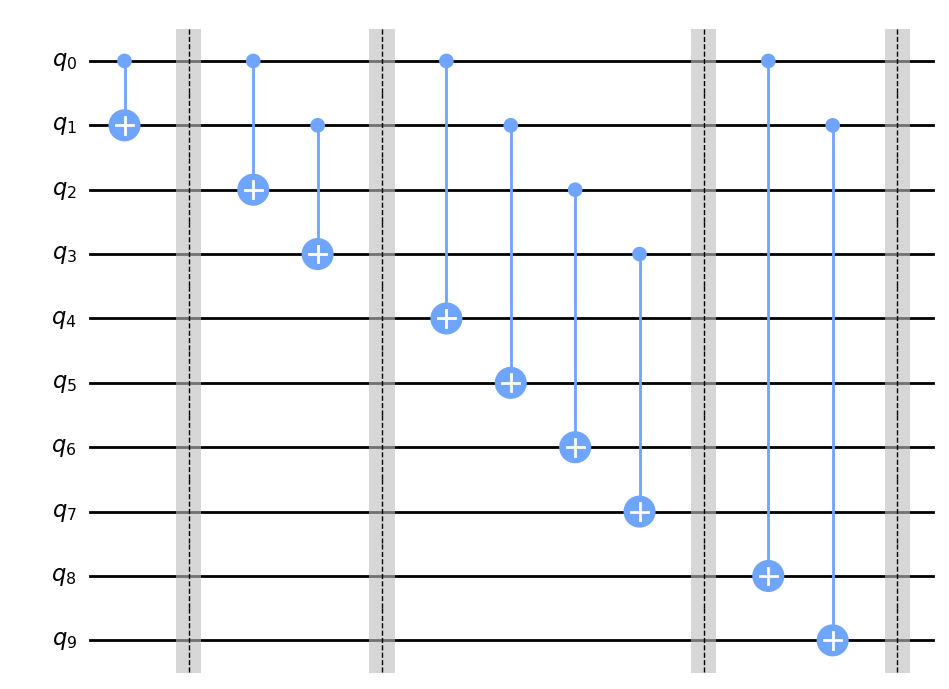

In [36]:
# Efficient method: the key here is to increase at each step the number of qubit performing a copy
def efficient_method(n,barrier=False):
    q = QuantumRegister(n,name='q')
    qc = QuantumCircuit(q)
    n_copy_done = 0
    for i in range(1+int(np.floor(np.log2(n)))):
        for j in range(2**i):
            if n_copy_done < n-1:
                qc.cnot(q[j],q[j+2**i])
                n_copy_done += 1
        if barrier:
            qc.barrier()
    return qc

efficient_method(10,barrier=True).draw('mpl')

c - Comparison of the both methods

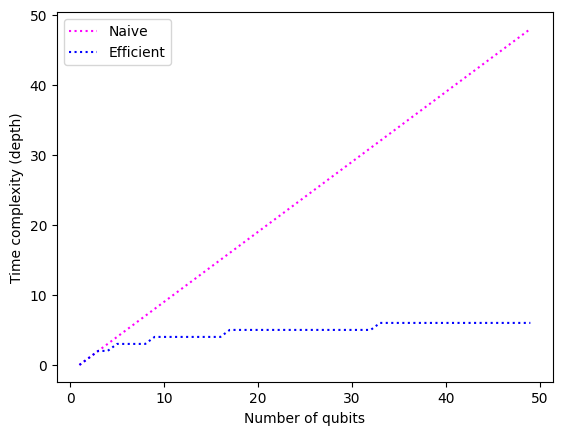

In [37]:
# Comparison of the depth scaling between the naive and efficient methods
x = np.arange(1,50)
naive_depth = [naive_method(n).depth() for n in x]
efficient_depth = [efficient_method(n).depth() for n in x]
plt.plot(x,naive_depth, label='Naive', color='magenta',linestyle='dotted')
plt.plot(x,efficient_depth, label='Efficient', color='blue',linestyle='dotted')
plt.legend()
plt.xlabel('Number of qubits')
plt.ylabel('Time complexity (depth)')
plt.show()

3 - Implementation of the vertical quantum circuit

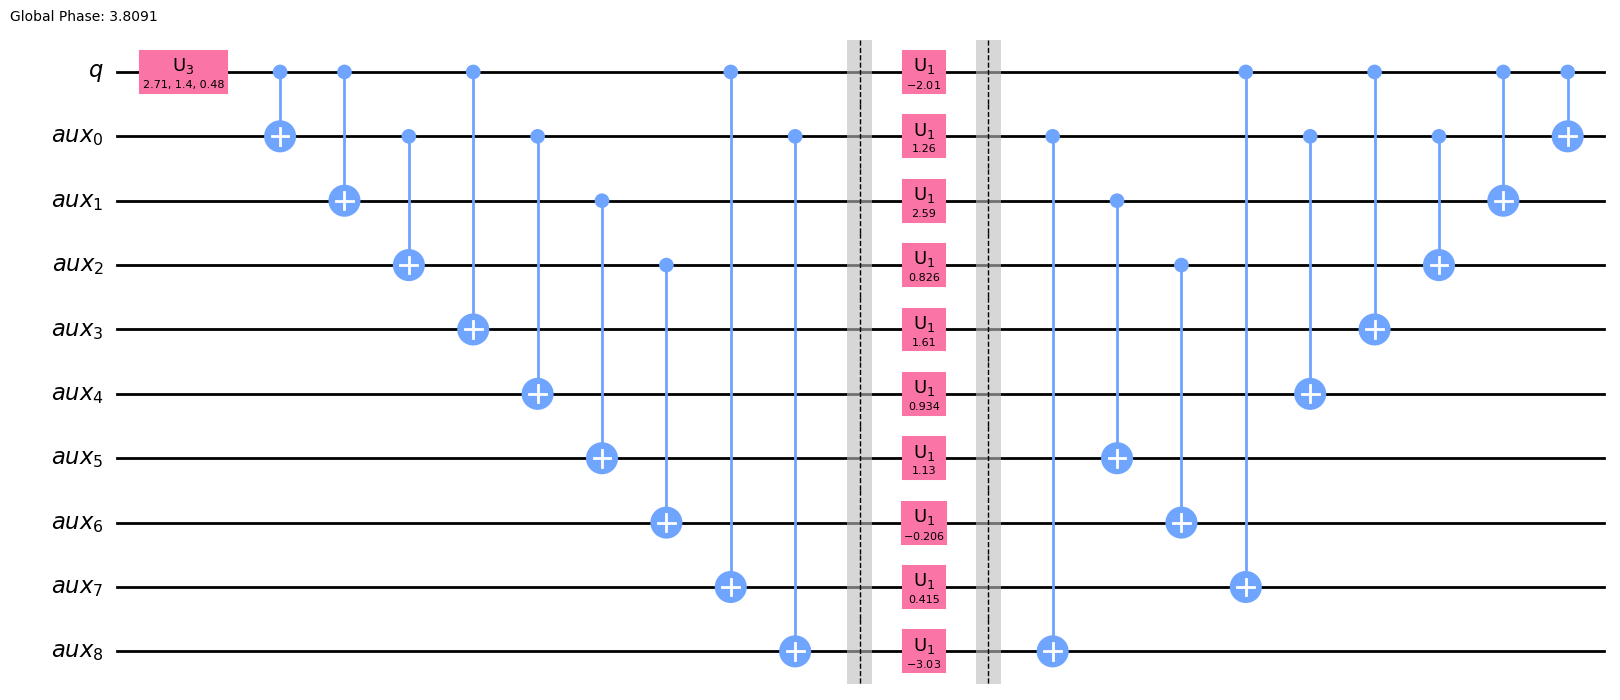

In [38]:
def vertical_rz(n,psi,angles,cnots=True):
    q = QuantumRegister(1, name='q')
    aux = AncillaRegister(n-1, name='aux')
    qc = QuantumCircuit(q,aux)
    qc.unitary(psi, q[0], label='$\psi$')
    entangling = efficient_method(n)
    gate = entangling.to_gate(label='CNOTs')
    if cnots:
        qc.append(gate, [q[0]] + [i for i in aux])  
    qc.barrier()
    qc.rz(angles[0],q[0])
    for i in range(n-1):
        qc.rz(angles[i+1],aux[i])
    qc.barrier()
    if cnots:
        qc.append(gate.inverse(), [q[0]] + [i for i in aux])
    return qc

vertical = vertical_rz(n_rz,psi,angles)
vertical.decompose().draw('mpl')

4 - Removing the entangling step

In [39]:
vertical_false = vertical_rz(n_rz,psi,angles,cnots=False)
print('With entanglement: '+str(fidelity(horizontal,vertical))+', Without: '+str(fidelity(horizontal,vertical_false)))

With entanglement: 1.0, Without: 0.9767635359680469


5 - Implementation of the trade-off quantum circuit

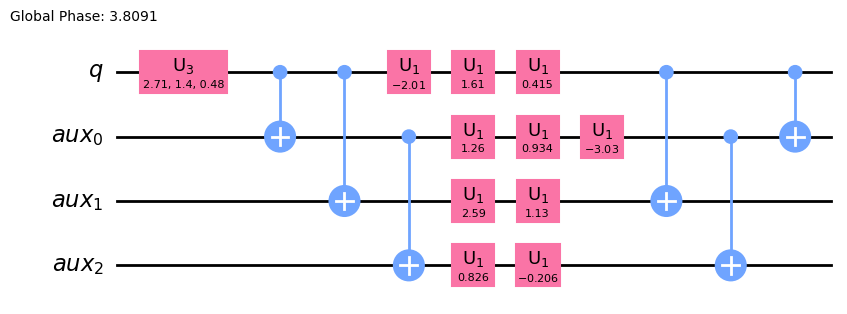

In [40]:
def tradeoff_rz(n,psi,angles,p,cnots=True):
    q = QuantumRegister(1, name='q')
    aux = AncillaRegister(p, name='aux')
    qc = QuantumCircuit(q,aux)
    qc.unitary(psi, q[0], label='$\psi$')
    entangling = efficient_method(p+1)
    gate = entangling.to_gate(label='CNOTs')
    if cnots:
        qc.append(gate, [q[0]] + [i for i in aux])    
    
    for i in range(int(np.ceil(n/(p+1)))):
        qc.rz(angles[i*(p+1)],q[0])
        for j in range(p):
            if i*(p+1)+j+1 < n:
                qc.rz(angles[i*(p+1)+j+1],aux[j])
    if cnots:
        qc.append(gate.inverse(), [q[0]] + [i for i in aux])
    return qc

p = 3
tradeoff = tradeoff_rz(n_rz,psi,angles,p)
tradeoff.decompose().draw('mpl')

In [41]:
print('Horizontal/Vertical: '+str(fidelity(horizontal,vertical)))
print('Horizontal/Tradeoff: '+str(fidelity(horizontal,tradeoff)))
print('Vertical/Tradeoff: '+str(fidelity(vertical,tradeoff)))

Horizontal/Vertical: 1.0
Horizontal/Tradeoff: 1.0
Vertical/Tradeoff: 1.0


6 - Plot of the depth and width for 100 $R_z$ gates

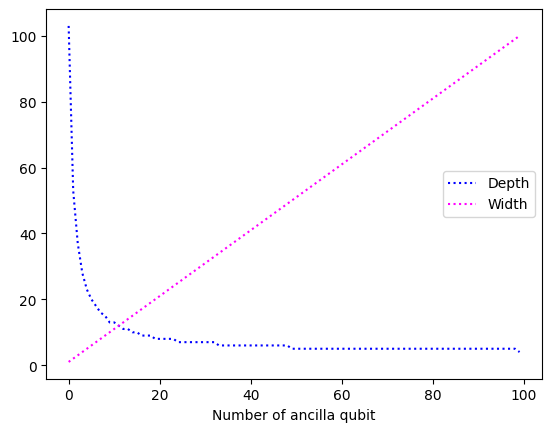

In [42]:
n_rz = 100
psi = random_unitary(2)
angles = [random.uniform(-np.pi, np.pi) for i in range(n_rz)]
depth = []
width = []

for i in range(n_rz):
    qc = tradeoff_rz(n_rz,psi,angles,i)
    depth.append(qc.depth())
    width.append(qc.width())

plt.plot(np.arange(n_rz),depth,label='Depth',linestyle='dotted',color='blue')
plt.plot(np.arange(n_rz),width,label='Width',linestyle='dotted',color='magenta')
plt.xlabel('Number of ancilla qubit')
plt.legend()
plt.show()

7 - Implementation of near_optimal_rz

First, we solve the equation $\frac{n}{p}= p + 1$:

\begin{equation}
\begin{split}
\frac{n}{p} &= p + 1 \\
p^2 + p - n &= 0 \\
p_{\pm} &= \frac{-1 \pm \sqrt{4n+1}}{2}
\end{split}
\end{equation}

As, $p_-$ is negative, the solution is $p_+$. We now add a term scaling in $O(\log_2(p-1))$ to have a better approximation, therefore we have:

\begin{equation}
\begin{split}
p^* &= p_+ + O(\log_2(p_+-1)) \\
&= \frac{-1 + \sqrt{4n+1}}{2} + \log_2\left(\frac{\sqrt{4n+1}-3}{2}\right)
\end{split}
\end{equation}

If $p_+ = 1$, $\log_2(p_+-1)$ is not defined, therefore we define $p^+$ as:
\begin{equation}
p_+ =
\begin{cases}
p_+ \mbox{ if } p_+ = 1 \\
p_+ + O(\log_2(p_+-1)) \mbox{ otherwise.}
\end{cases}
\end{equation}

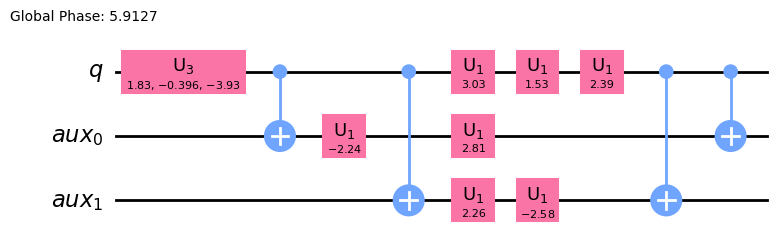

In [43]:
def near_optimal_rz(n,psi,angles):
    p_plus = (-1+np.sqrt(4*n+1))/2
    if p_plus == 1:
        p_star = int(p_plus)
    else:
        p_star = int(p_plus + np.log2(p_plus-1))
    return tradeoff_rz(n,psi,angles,p_star)

n_rz = 7
psi = random_unitary(2)
angles = [random.uniform(-np.pi, np.pi) for i in range(n_rz)]

optimal = near_optimal_rz(n_rz,psi,angles)
optimal.decompose().draw('mpl')

6 - This method only works for diagonal unitaries as the key is to use entanglement, by using non diagonal unitaries one would break the entanglement and therefore not only act on the quantum state of $|\psi>$